In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# 한글 폰트 세팅

In [2]:
df88 = pd.read_csv("cluster17.csv")

In [3]:
df88 = df88.rename(columns = {'Unnamed: 0': 'newID'})

In [44]:
df88.head()

,newID,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,Q13,D_COU,D_GEN,D_AGE,D_MON,cluster
0,1-1,-0.379497,-0.691371,1,1,5,5,1,0,0,...,0,0,0,-0.161105,1,13,1,3,1,1
1,2-1,-0.379497,0.803331,1,3,6,2,1,0,0,...,0,0,0,-0.458341,1,2,1,5,2,1
2,3-1,0.288003,-0.691371,1,8,2,3,1,0,0,...,0,0,0,-0.458341,1,2,2,2,3,2
3,4-1,-0.245997,-0.691371,1,2,11,1,1,0,0,...,0,0,0,0.284749,1,2,2,2,4,1
4,5-1,-0.112497,0.055980,1,1,6,3,1,0,0,...,0,0,0,-0.384032,1,2,2,3,5,2


In [4]:
fr = pd.read_csv("raw_data_87.csv")

In [5]:
# D_MON + '-' + ID 일련번호 새로운 변수(newID) 만들기
fr['newID'] = fr['D_MON'].astype('int').astype('str') + '-' + fr['ID'].astype('str')

In [6]:
fr2 = fr.loc[:,['newID','Q9_2A1','Q10_5A1','Q11A1']]

In [7]:
df = pd.merge(df88, fr2, on='newID', how='left')

In [8]:
df.head()

,newID,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_3A1,Q13,D_COU,D_GEN,D_AGE,D_MON,cluster,Q9_2A1,Q10_5A1,Q11A1
0,1-1,-0.379497,-0.691371,1,1,5,5,1,0,0,...,-0.161105,1,13,1,3,1,1,10,7,14
1,2-1,-0.379497,0.803331,1,3,6,2,1,0,0,...,-0.458341,1,2,1,5,2,1,1,1,1
2,3-1,0.288003,-0.691371,1,8,2,3,1,0,0,...,-0.458341,1,2,2,2,3,2,1,3,1
3,4-1,-0.245997,-0.691371,1,2,11,1,1,0,0,...,0.284749,1,2,2,2,4,1,1,5,1
4,5-1,-0.112497,0.055980,1,1,6,3,1,0,0,...,-0.384032,1,2,2,3,5,2,1,1,1


In [ ]:
# Q5_1, Q6_1A1, Q6_3A1, Q9_2A1, Q10_5A1, Q11A1, D_MON

In [9]:
def cluster(x) :
    if x == 3 :
        return "1"
    else :
        return "2"

df['cluster2'] = df['cluster'].apply(cluster)
df.head()

,newID,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q13,D_COU,D_GEN,D_AGE,D_MON,cluster,Q9_2A1,Q10_5A1,Q11A1,cluster2
0,1-1,-0.379497,-0.691371,1,1,5,5,1,0,0,...,1,13,1,3,1,1,10,7,14,2
1,2-1,-0.379497,0.803331,1,3,6,2,1,0,0,...,1,2,1,5,2,1,1,1,1,2
2,3-1,0.288003,-0.691371,1,8,2,3,1,0,0,...,1,2,2,2,3,2,1,3,1,2
3,4-1,-0.245997,-0.691371,1,2,11,1,1,0,0,...,1,2,2,2,4,1,1,5,1,2
4,5-1,-0.112497,0.055980,1,1,6,3,1,0,0,...,1,2,2,3,5,2,1,1,1,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13437 entries, 0 to 13436
Data columns (total 35 columns):
newID       13437 non-null object
Q1          13437 non-null float64
Q2_1        13437 non-null float64
Q5_1        13437 non-null int64
Q5_2A1      13437 non-null int64
Q6_1A1      13437 non-null int64
Q6_3A1      13437 non-null int64
Q10_1A1     13437 non-null int64
Q10_1A2     13437 non-null int64
Q10_1A3     13437 non-null int64
Q10_1A4     13437 non-null int64
Q10_1A5     13437 non-null int64
Q10_1A6     13437 non-null int64
Q10_1A7     13437 non-null int64
Q10_1A8     13437 non-null int64
Q10_1A9     13437 non-null int64
Q10_1A10    13437 non-null int64
Q10_1A11    13437 non-null int64
Q10_1A12    13437 non-null int64
Q10_1A13    13437 non-null int64
Q10_1A14    13437 non-null int64
Q10_1A15    13437 non-null int64
Q10_1A16    13437 non-null int64
Q10_1A17    13437 non-null int64
Q10_3A1     13437 non-null float64
Q13         13437 non-null int64
D_COU       13437 non-null

In [19]:
df['cluster2'] = df['cluster2'].astype('int')

In [20]:
for i in range(1,3) :
    display(df[df['cluster2'] == i]['Q5_1'].value_counts()/df[df['cluster2'] == i]['Q5_1'].size*100)

2    87.124682
3    10.203562
1     1.348601
4     0.737913
5     0.585242
Name: Q5_1, dtype: float64

1    99.389923
2     0.315557
4     0.126223
3     0.126223
5     0.042074
Name: Q5_1, dtype: float64

In [21]:
for i in range(1,3) :
    display(df[df['cluster2'] == i]['Q6_1A1'].value_counts()/df[df['cluster2'] == i]['Q6_1A1'].size*100)

1     29.287532
6     25.979644
11    18.778626
2     11.297710
3      3.129771
4      3.078880
5      2.977099
9      2.468193
8      1.348601
7      1.221374
10     0.432570
Name: Q6_1A1, dtype: float64

1     35.279268
6     26.412117
2     16.892816
3      6.710845
5      4.586094
11     3.365941
4      2.408751
7      2.072157
8      1.188598
9      0.936152
10     0.147260
Name: Q6_1A1, dtype: float64

In [22]:
for i in range(1,3) :
    display(df[df['cluster2'] == i]['Q6_3A1'].value_counts()/df[df['cluster2'] == i]['Q6_3A1'].size*100)

2     31.806616
1     20.636132
5     16.208651
3      9.058524
9      6.081425
98     5.979644
8      3.155216
4      2.900763
6      1.882952
10     1.450382
7      0.839695
Name: Q6_3A1, dtype: float64

1     33.249185
2     24.297886
3     12.780057
5     10.013674
4      7.405070
9      3.187125
7      2.419270
6      2.314084
98     1.809193
8      1.746082
10     0.778374
Name: Q6_3A1, dtype: float64

In [23]:
for i in range(1,3) :
    display(df[df['cluster2'] == i]['Q9_2A1'].value_counts()/df[df['cluster2'] == i]['Q9_2A1'].size*100)

13    49.516539
2     10.865140
1     10.203562
4      6.590331
3      5.979644
14     4.452926
9      1.653944
6      1.603053
10     1.603053
5      1.450382
18     1.145038
15     1.094148
7      0.687023
20     0.661578
12     0.610687
8      0.585242
19     0.432570
16     0.330789
17     0.279898
11     0.254453
Name: Q9_2A1, dtype: float64

1     26.065005
2     24.518776
3     14.136952
4     11.223309
9      4.144315
10     3.776165
7      2.513937
5      2.030083
6      1.682970
17     1.535711
18     1.535711
8      1.335858
20     1.230672
12     1.199116
19     0.904597
16     0.746818
11     0.694225
14     0.368150
13     0.305038
15     0.042074
98     0.010519
Name: Q9_2A1, dtype: float64

In [24]:
for i in range(1,3) :
    display(df[df['cluster2'] == i]['Q10_5A1'].value_counts()/df[df['cluster2'] == i]['Q10_5A1'].size*100)

1    78.295165
6     5.216285
2     4.402036
5     3.765903
3     3.689567
7     1.806616
4     1.501272
8     1.170483
9     0.152672
Name: Q10_5A1, dtype: float64

1    56.894920
3    13.327022
5    12.106869
7     8.425371
2     5.637951
4     2.440307
9     0.694225
8     0.273483
6     0.199853
Name: Q10_5A1, dtype: float64

In [25]:
for i in range(1,3) :
    display(df[df['cluster2'] == i]['Q11A1'].value_counts()/df[df['cluster2'] == i]['Q11A1'].size*100)

1      20.381679
14      9.109415
4       7.709924
107     3.918575
6       3.715013
3       3.715013
61      3.384224
2       2.748092
10      2.722646
5       2.646310
78      2.340967
16      2.035623
57      1.806616
7       1.755725
68      1.221374
9       1.043257
8       1.043257
106     1.043257
108     0.966921
73      0.916031
34      0.890585
100     0.814249
76      0.788804
27      0.763359
15      0.712468
13      0.661578
98      0.661578
60      0.661578
63      0.661578
43      0.636132
         ...    
483     0.025445
39      0.025445
37      0.025445
33      0.025445
554     0.025445
234     0.025445
236     0.025445
238     0.025445
240     0.025445
246     0.025445
262     0.025445
270     0.025445
274     0.025445
288     0.025445
308     0.025445
354     0.025445
558     0.025445
29      0.025445
560     0.025445
572     0.025445
662     0.025445
698     0.025445
998     0.025445
669     0.025445
609     0.025445
749     0.025445
21      0.025445
23      0.0254

1      33.743557
10      7.773220
4       7.247291
57      6.826549
3       5.469654
107     4.112759
14      3.071421
5       2.871568
2       2.850531
80      2.587567
13      1.199116
78      1.146524
108     1.146524
6       1.051857
112     1.030819
62      1.009782
109     0.978227
8       0.946671
83      0.925634
63      0.662670
7       0.557484
77      0.557484
9       0.515410
61      0.494373
16      0.483854
15      0.473335
12      0.473335
110     0.462817
72      0.441780
81      0.420743
         ...    
483     0.010519
563     0.010519
635     0.010519
691     0.010519
663     0.010519
564     0.010519
412     0.010519
284     0.010519
204     0.010519
303     0.010519
205     0.010519
602     0.010519
309     0.010519
273     0.010519
281     0.010519
361     0.010519
565     0.010519
553     0.010519
633     0.010519
485     0.010519
84      0.010519
482     0.010519
285     0.010519
229     0.010519
213     0.010519
202     0.010519
210     0.010519
306     0.0105

In [26]:
for i in range(1,3) :
    display(df[df['cluster2'] == i]['D_MON'].value_counts()/df[df['cluster2'] == i]['D_MON'].size*100)

1     10.381679
4     10.254453
12     8.524173
3      8.422392
7      8.269720
5      8.167939
6      7.989822
10     7.964377
8      7.659033
9      7.608142
11     7.582697
2      7.175573
Name: D_MON, dtype: float64

9     9.393079
11    8.614705
7     8.414852
5     8.414852
10    8.404334
8     8.393815
6     8.299148
2     8.141370
3     8.130851
12    8.120332
4     7.930998
1     7.741664
Name: D_MON, dtype: float64

In [27]:
df88.head()

,newID,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,Q13,D_COU,D_GEN,D_AGE,D_MON,cluster
0,1-1,-0.379497,-0.691371,1,1,5,5,1,0,0,...,0,0,0,-0.161105,1,13,1,3,1,1
1,2-1,-0.379497,0.803331,1,3,6,2,1,0,0,...,0,0,0,-0.458341,1,2,1,5,2,1
2,3-1,0.288003,-0.691371,1,8,2,3,1,0,0,...,0,0,0,-0.458341,1,2,2,2,3,2
3,4-1,-0.245997,-0.691371,1,2,11,1,1,0,0,...,0,0,0,0.284749,1,2,2,2,4,1
4,5-1,-0.112497,0.055980,1,1,6,3,1,0,0,...,0,0,0,-0.384032,1,2,2,3,5,2


In [2]:
df89 = pd.read_csv("df_cl_17.csv")

In [3]:
df89.head()

,Unnamed: 0,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON,cluster
0,1-1,1,0,1,1,5,5,1,0,0,...,0,0,0,0,7,13,1,3,1,1
1,2-1,1,4,1,3,6,2,1,0,0,...,0,0,0,0,3,2,1,5,2,1
2,3-1,6,0,1,8,2,3,1,0,0,...,0,0,0,0,3,2,2,2,3,2
3,4-1,2,0,1,2,11,1,1,0,0,...,0,0,0,0,13,2,2,2,4,1
4,5-1,3,2,1,1,6,3,1,0,0,...,0,0,0,0,4,2,2,3,5,2


In [4]:
df89 = df89.rename(columns = {'Unnamed: 0': 'newID'})

In [5]:
df89.head()

,newID,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON,cluster
0,1-1,1,0,1,1,5,5,1,0,0,...,0,0,0,0,7,13,1,3,1,1
1,2-1,1,4,1,3,6,2,1,0,0,...,0,0,0,0,3,2,1,5,2,1
2,3-1,6,0,1,8,2,3,1,0,0,...,0,0,0,0,3,2,2,2,3,2
3,4-1,2,0,1,2,11,1,1,0,0,...,0,0,0,0,13,2,2,2,4,1
4,5-1,3,2,1,1,6,3,1,0,0,...,0,0,0,0,4,2,2,3,5,2


In [6]:
X_train = df89.drop(['newID','cluster'], axis = 1)
y_train = df89['cluster']

In [7]:
y_train

0        1
1        1
2        2
3        1
4        2
5        1
6        2
7        2
8        3
9        4
10       2
11       2
12       3
13       1
14       3
15       2
16       4
17       4
18       4
19       1
20       1
21       2
22       1
23       3
24       2
25       2
26       1
27       2
28       2
29       3
        ..
13407    3
13408    6
13409    1
13410    4
13411    2
13412    3
13413    1
13414    2
13415    3
13416    3
13417    1
13418    2
13419    3
13420    3
13421    4
13422    2
13423    4
13424    4
13425    2
13426    1
13427    4
13428    5
13429    5
13430    5
13431    5
13432    5
13433    5
13434    5
13435    5
13436    5
Name: cluster, Length: 13437, dtype: int64

In [20]:
X_train.head()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
0,1,0,1,1,5,5,1,0,0,0,...,0,0,0,0,0,7,13,1,3,1
1,1,4,1,3,6,2,1,0,0,0,...,0,0,0,0,0,3,2,1,5,2
2,6,0,1,8,2,3,1,0,0,0,...,0,0,0,0,0,3,2,2,2,3
3,2,0,1,2,11,1,1,0,0,0,...,0,0,0,0,0,13,2,2,2,4
4,3,2,1,1,6,3,1,0,0,0,...,0,0,0,0,0,4,2,2,3,5


In [12]:
X_train['D_GEN'] = X_train['D_GEN'].replace(1,0)
X_train['D_GEN'] = X_train['D_GEN'].replace(2,1)

In [13]:
X_train.head()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
0,1,0,1,1,5,5,1,0,0,0,...,0,0,0,0,0,7,13,0,3,1
1,1,4,1,3,6,2,1,0,0,0,...,0,0,0,0,0,3,2,0,5,2
2,6,0,1,8,2,3,1,0,0,0,...,0,0,0,0,0,3,2,1,2,3
3,2,0,1,2,11,1,1,0,0,0,...,0,0,0,0,0,13,2,1,2,4
4,3,2,1,1,6,3,1,0,0,0,...,0,0,0,0,0,4,2,1,3,5


In [44]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [72]:
dataP_imp.head()

,Q1,Q2_1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,Q10_1A5,Q10_1A6,Q10_1A7,Q10_1A8,...,D_MON_3,D_MON_4,D_MON_5,D_MON_6,D_MON_7,D_MON_8,D_MON_9,D_MON_10,D_MON_11,D_MON_12
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3,2,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


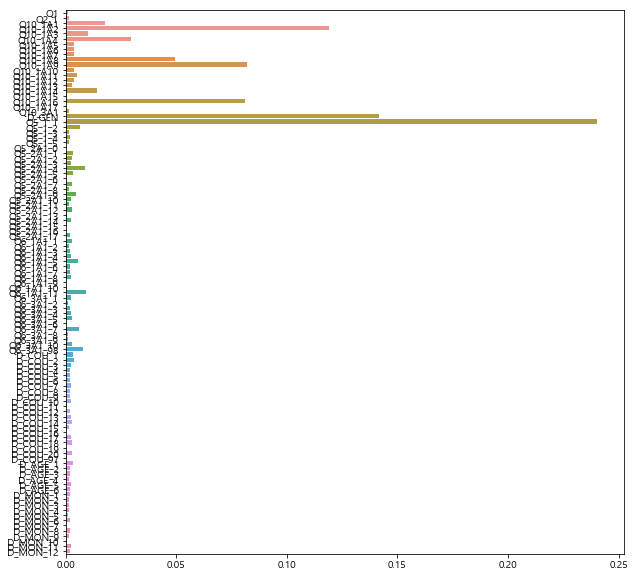

In [74]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.barplot(x=model.feature_importances_, y=dataP_imp.columns)

In [45]:
X_train.head()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
0,1,0,1,1,5,5,1,0,0,0,...,0,0,0,0,0,7,13,1,3,1
1,1,4,1,3,6,2,1,0,0,0,...,0,0,0,0,0,3,2,1,5,2
2,6,0,1,8,2,3,1,0,0,0,...,0,0,0,0,0,3,2,2,2,3
3,2,0,1,2,11,1,1,0,0,0,...,0,0,0,0,0,13,2,2,2,4
4,3,2,1,1,6,3,1,0,0,0,...,0,0,0,0,0,4,2,2,3,5


In [49]:
xgb = XGBClassifier(random_state=0, objective = 'multi:softmax')
xgb.fit(x_tr, y_tr)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields D_COU

In [51]:
y_pred = xgb.predict(x_ts)

In [52]:
y_pred

array([3, 5, 2, ..., 4, 4, 5], dtype=int64)

In [53]:
accuracy_score(y_ts, y_pred)

0.9159226190476191

In [54]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(xgb, x_tr, y_tr, cv=5)
print('{}\nmean = {:.5f}\nstd = {:.5f}'.format(score, score.mean(), score.std()))

[0.92299522 0.91498406 0.9122807  0.9138756  0.91906283]
mean = 0.91664
std = 0.00389


In [18]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

xgb.plot_tree(xgb, num_trees=2)

AttributeError: 'XGBClassifier' object has no attribute 'plot_tree'

In [10]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='malgun gothic')
rc('axes', unicode_minus=False)

In [18]:
df89['cluster'].value_counts()

3    3930
2    3488
1    1934
5    1494
4    1120
6     783
7     688
Name: cluster, dtype: int64

In [21]:
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *

In [22]:
rdus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rdus.fit_sample(dataP_imp, y_train)

In [28]:
rdus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rdus.fit_sample(x_train2, y_train2)

In [30]:
y_pred = XGBClassifier(random_state=0).fit(X_resampled, y_resampled)#.predict(X_test)

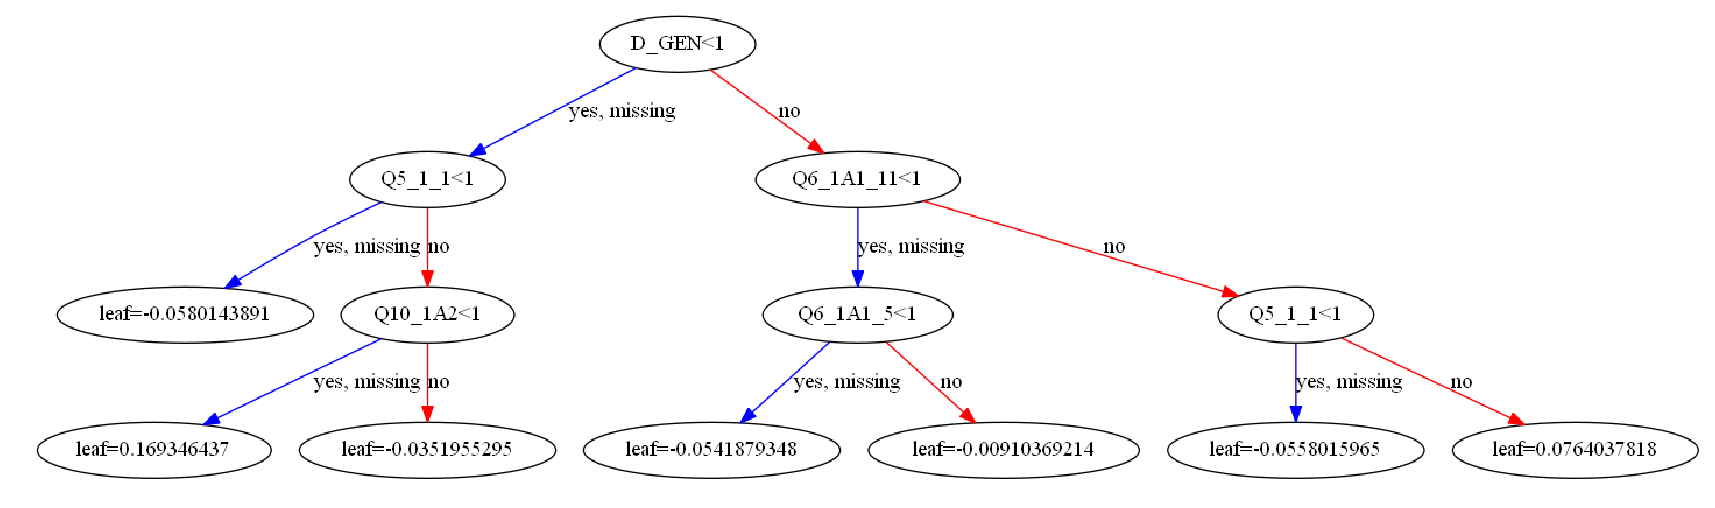

In [52]:
#plt.figure(figsize=(24,16))
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb, ax=ax)
plt.savefig("temp1.pdf")

In [14]:
dataP_imp = pd.get_dummies(X_train,columns=['Q5_1','Q5_2A1','Q6_1A1', 'Q6_3A1', 'D_COU', 'D_AGE', 'D_MON'])

x_tr, x_ts, y_tr, y_ts = train_test_split(dataP_imp,y_train, test_size=0.3, random_state=0)

xgb = XGBClassifier()

xgb.fit(x_train2,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [26]:
y_pred = xgb.predict(x_test2)

In [27]:
y_pred

array([3, 5, 2, ..., 4, 4, 5], dtype=int64)

In [28]:
accuracy_score(y_test2, y_pred)

0.9171626984126984

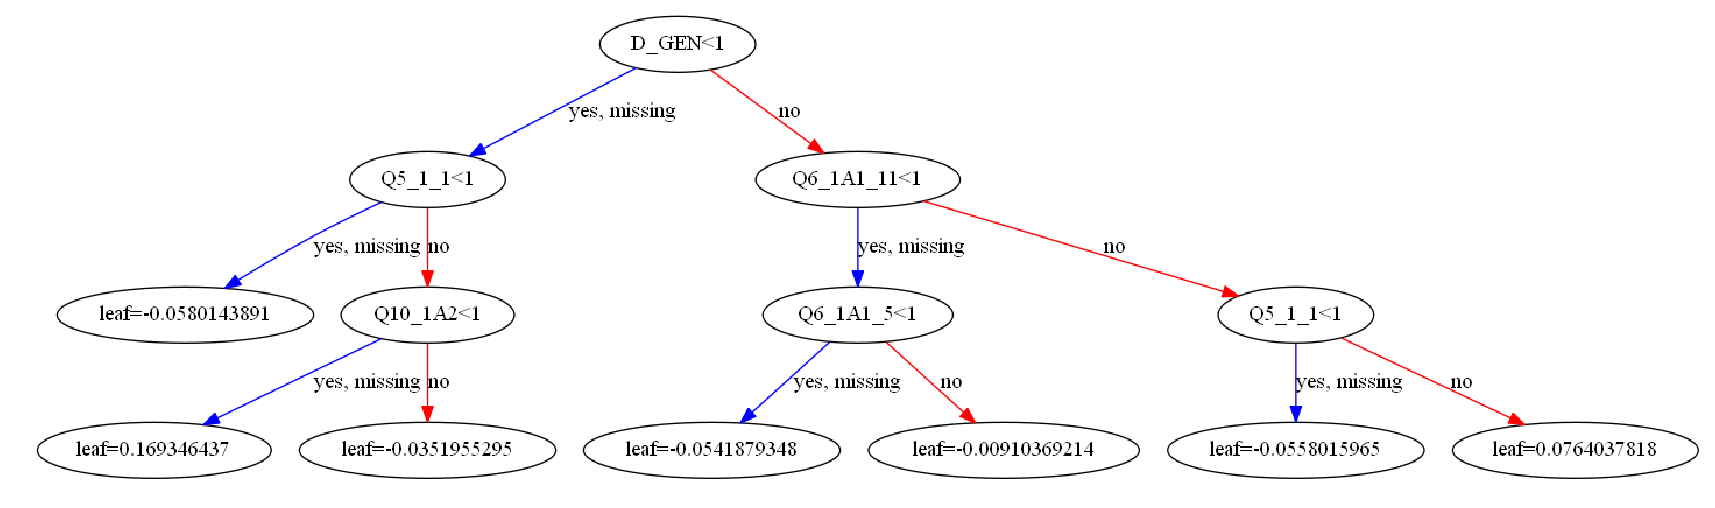

In [15]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb, ax=ax)
#plt.savefig("temp5.pdf")

In [12]:
X_train.columns

Index(['Q1', 'Q2_1', 'Q5_1', 'Q5_2A1', 'Q6_1A1', 'Q6_3A1', 'Q10_1A1',
       'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5', 'Q10_1A6', 'Q10_1A7',
       'Q10_1A8', 'Q10_1A9', 'Q10_1A10', 'Q10_1A11', 'Q10_1A12', 'Q10_1A13',
       'Q10_1A14', 'Q10_1A15', 'Q10_1A16', 'Q10_1A17', 'Q10_3A1', 'D_COU',
       'D_GEN', 'D_AGE', 'D_MON'],
      dtype='object')

In [30]:
!pip install GraphViz

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [32]:
from sklearn.tree import export_graphviz

In [62]:
xgb.fit(x_train2,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [65]:
xgb = XGBClassifier()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_1A13,Q10_1A14,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,D_COU,D_GEN,D_AGE,D_MON
0,1,0,1,1,5,5,1,0,0,0,...,0,0,0,0,0,7,13,0,3,1
1,1,4,1,3,6,2,1,0,0,0,...,0,0,0,0,0,3,2,0,5,2
2,6,0,1,8,2,3,1,0,0,0,...,0,0,0,0,0,3,2,1,2,3
3,2,0,1,2,11,1,1,0,0,0,...,0,0,0,0,0,13,2,1,2,4
4,3,2,1,1,6,3,1,0,0,0,...,0,0,0,0,0,4,2,1,3,5


In [66]:
model = XGBClassifier()
model.fit(x_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [70]:
xgb.plot.multi.trees(model)

NameError: name 'xgb' is not defined

In [40]:
!pip install pydotplus

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [41]:
!pip install graphviz

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [45]:
from sklearn.tree import export_graphviz
import graphviz

In [46]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(x_train2, y_train2).score(x_train2, y_train2)

0.7623604465709729

In [60]:
y_pred = xgb.predict(x_test2)

In [61]:
pd.Series(y_pred).unique()

array([3, 5, 2, 7, 1, 4, 6], dtype=int64)

In [48]:
accuracy_score(y_test2, y_pred)

0.7619047619047619

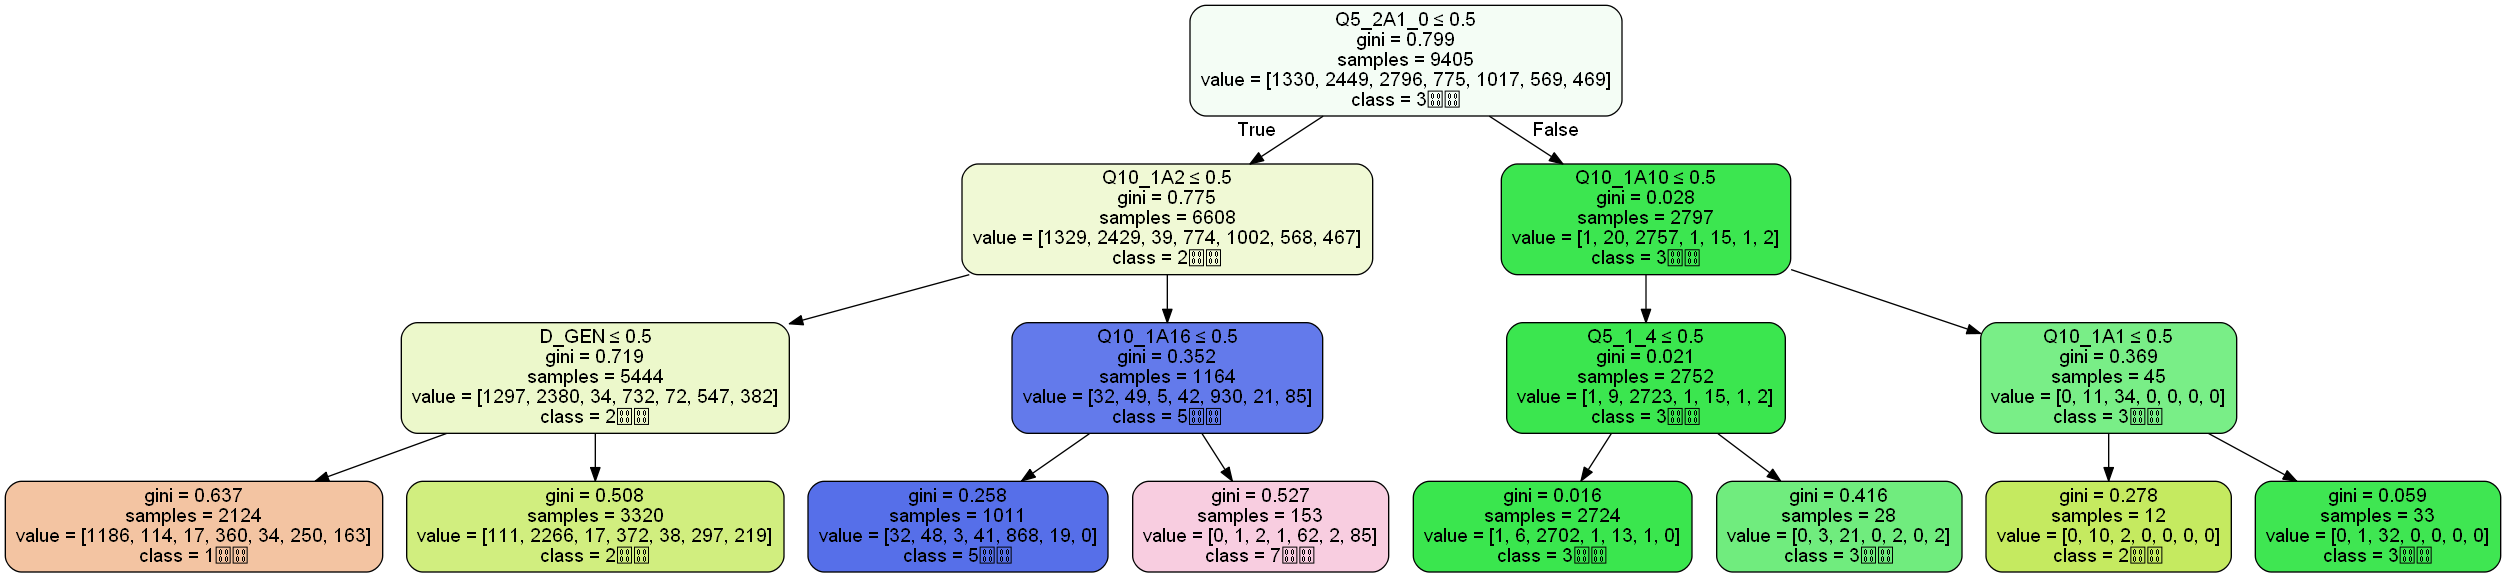

In [53]:
# 아래 코드를 실행하여 오류가 발생하면, method #2 실행

from IPython.display import Image  
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=x_train2.columns,  
                           class_names=['1군집','2군집','3군집','4군집','5군집','6군집','7군집'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graph_from_dot_data(dot_data)  
Image(graph.create_png())
#graph.write_pdf("tree_model.pdf") 

In [39]:
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier

from dtreeviz.trees import *

ModuleNotFoundError: No module named 'dtreeviz'

In [35]:
# 아래 코드를 실행하여 오류가 발생하면, method #2 실행

from IPython.display import Image  
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(xgb, out_file=None,
                           feature_names=x_train2.columns,  
                           class_names=['1군집','2군집','3군집','4군집','5군집','6군집','7군집'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graph_from_dot_data(dot_data)  
Image(graph.create_png())
#graph.write_pdf("tree_model.pdf") 

NotFittedError: This XGBClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.